### IMPORTS


In [82]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report, confusion_matrix

### Define el problema y objetivos

Vamos a trabajar con un dataset de imágenes de caras de personas las que trataremos de clasificar. No obstante puesto que podemos variar el número de veces que puede aparecer la cara de una persona vamos a optar en un primer caso por tener muchas personas aunque aparezcan pocas veces y más tarde realizaremos el estudio con menos personas pero que tengamos una información mínima de cada una.

### Obtención de datos

La obtención de las imágenes lo vamos a hacer a través de un dataset que ya está en la librería sklearn

In [116]:
faces = fetch_lfw_people(min_faces_per_person=20)

Hemos cargado imágenes de personas famosas, para cargar estos datos nos obliga a poner un número mínimo de apariciones de la persona. Hemos puesto 20 

### Limpieza y exploración de los datos

En primer lugar vamos a contemplar las diferentes etiquetas que tenemos

In [17]:
print(faces.target_names)
print("Etiquetas únicas:", len(faces.target_names))

['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Silvio Berlusconi' 'Tiger Woods' 'Tom Das

Veamos también las dimensiones de las imágenes

In [18]:
faces.images.shape

(3023, 62, 47)

También vamos a ver algunas de las imágenes para comprobar que se han cargado bien:

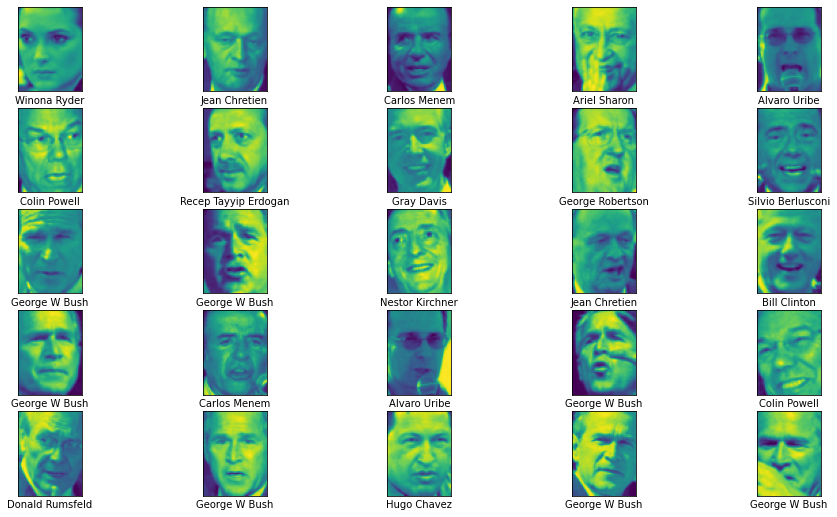

In [20]:
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i])
    ax_i.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

Vamos a aprovechar, para ver como se distribuyen las etiquetas únicas:

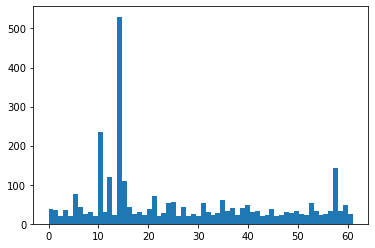

In [30]:
plt.hist(faces.target,62)
plt.show()


Acaba la exploración de los datos podemos sacar varias conclusiones:
* Tenemos algunas caras que aparecen bastante más que otras
* Cada imagen consta de 62x47=2914 píxeles, si hacemos que cada pixel cuenta tendríamos un espacio de 2914 dimensiones.


### Prueba de los modelos 

Se trata de un modelo de clasificación con aprendizaje supervisado. No obstante, tenemos como hemos dicho el problema de demasiadas dimensiones para solucionarlo aplicaremos PCA para cada modelo antes de entrenar y posteriormente estudiaremos las accuracys.

In [117]:
#En primer lugar vamos a separar en conunto de entrenamiento y de testing
X_train, X_test,y_train,y_test= train_test_split(faces.data, faces.target, random_state=42)

Como hemos comentado antes de aplicar cada modelo deberemos realizar un análisis de componentes principales y luego el posterior análisis por ello vamos a utilizar la herramiente pipeline

#### Logistic Regression

In [97]:
log = LogisticRegression(max_iter=1000)
pca = RandomizedPCA(n_components=150, whiten=True)
model = make_pipeline(pca,log)
model.fit(X_train,y_train)
prediction_logistic = model.predict(X_test)
acc_log = round(accuracy_score(prediction_logistic,y_test) * 100, 2)
print('La precisión (accuracy) de la regresión logistica es {}%'.format(acc_log))

La precisión (accuracy) de la regresión logistica es 55.03%


#### Decision Tree Classifier

In [41]:
tree = DecisionTreeClassifier()
pca = RandomizedPCA(n_components=150, whiten=True)
model = make_pipeline(pca,tree)
model.fit(X_train, y_train)
prediction_tree = model.predict(X_test)
acc_tree = round(accuracy_score(prediction_tree,y_test) * 100, 2)
print('La precisión (accuracy) del decision tree clasiffier es {}%'.format(acc_tree))

La precisión (accuracy) del decision tree clasiffier es 15.48%


#### KNN

([<matplotlib.axis.XTick at 0x163c5d763d0>,
 <a list of 5 Text major ticklabel objects>)

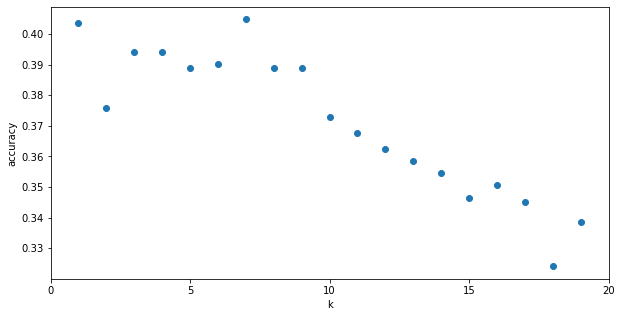

In [44]:
#Para obtener el número de vecinos, debemos ejecutar un pequeño código
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    pca = RandomizedPCA(n_components=150, whiten=True)
    model = make_pipeline(pca,knn)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(10,5))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [45]:
knn=KNeighborsClassifier(n_neighbors=7)
pca = RandomizedPCA(n_components=150, whiten=True)
model = make_pipeline(pca,knn)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
acc_knn = round(accuracy_score(prediction_knn,y_test) * 100, 2)
print('La precisión (accuracy) del decision knn es {}%'.format(acc_knn))

La precisión (accuracy) del decision knn es 40.34%


#### Random Forest

In [46]:
forest=RandomForestClassifier(n_estimators=100)
pca = RandomizedPCA(n_components=150, whiten=True)
model = make_pipeline(pca,forest)
model.fit(X_train,y_train)
prediction_rf=model.predict(X_test)
acc_rf = round(accuracy_score(prediction_rf,y_test)*100,2)
print('La precisión (accuracy) del Random Forest es {}%'.format(acc_rf))

La precisión (accuracy) del Random Forest es 26.98%


#### Gaussian NB

In [48]:
gauss=GaussianNB()
pca = RandomizedPCA(n_components=150, whiten=True)
model = make_pipeline(pca,gauss)
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)
acc_gnb=round(accuracy_score(prediction_gnb,y_test) * 100, 2)
print('La precisión (accuracy) de Gaussian Naive Bayes es {}%'.format(acc_gnb))

La precisión (accuracy) de Gaussian Naive Bayes es 49.87%


#### SVC

In [118]:
pca = RandomizedPCA(n_components=150, whiten=True)
svc = SVC(kernel="rbf", class_weight = "balanced")
model =make_pipeline(pca, svc)

Antes de aplicar el modelo, podemos con el método GridSearchCV buscar la mejor validación cruzada del modelo con unos parámetros que definiremos

In [119]:
param_grid={
    "svc__C":[0.1,1,5,10,15,20,50],
    "svc__gamma":[0.0001,0.0005,0.001,0.005,0.01]
    
}

grid=GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)

Wall time: 12min 1s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.1, 1, 5, 10, 15, 20, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]})

In [120]:
print (grid.best_params_)

{'svc__C': 15, 'svc__gamma': 0.001}


In [121]:
classifier = grid.best_estimator_
yfit = classifier.predict(X_test)
acc_svc=round(accuracy_score(yfit,y_test) * 100, 2)
print('La precisión (accuracy) de SVC es {}%'.format(acc_svc))

La precisión (accuracy) de SVC es 62.3%


#### Comprobación de resultados

In [64]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVC', 'Decision Trees',"Random Forest","GaussianNB","KNN"],
    'Score': [acc_log, acc_svc, acc_tree,acc_rf,acc_gnb,acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,SVC,60.71
0,Logistic Regression,54.89
4,GaussianNB,49.87
5,KNN,40.34
3,Random Forest,26.98
2,Decision Trees,15.48


Obtenemos que el mejor es el SVC y Logistic Regression

### Evaluación de mis algoritmos

### Logistic Regression

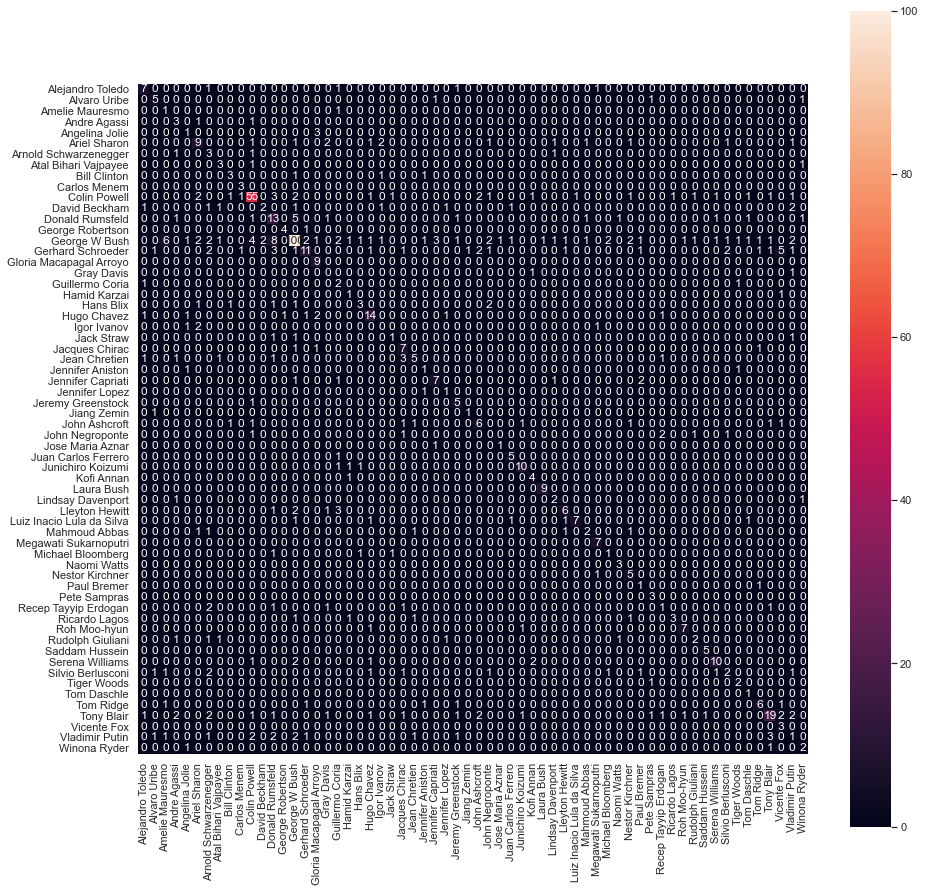

In [98]:
mat=confusion_matrix(y_test,prediction_logistic)
sns.heatmap(mat.T, square=True, annot = True, fmt="d", cbar=True, xticklabels=faces.target_names,
           yticklabels=faces.target_names)

Podemos observar que al tener tantas etiquetas no es eficiente fijarse en la matriz de confusión, ya que hay demasiada información y no se puede apreciar.

In [99]:
#classification report
report = classification_report(y_test, prediction_logistic)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.62      0.56      0.59         9
           2       0.50      0.10      0.17        10
           3       0.60      0.30      0.40        10
           4       0.25      0.17      0.20         6
           5       0.41      0.50      0.45        18
           6       0.50      0.17      0.25        18
           7       0.60      0.43      0.50         7
           8       0.50      0.50      0.50         6
           9       1.00      0.60      0.75         5
          10       0.71      0.77      0.74        71
          11       0.18      0.50      0.27         4
          12       0.48      0.36      0.41        36
          13       0.80      0.80      0.80         5
          14       0.61      0.81      0.70       123
          15       0.30      0.65      0.41        17
          16       1.00      0.56      0.72        16
          17       0.00    

En este caso, tenemos para algunos datos bastante f1, pero en lo general tenemos 55% de accuracy, luego no es un gran modelo. 

### SVC

In [122]:
#classification report
report = classification_report(y_test, yfit)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.71      0.56      0.63         9
           2       0.57      0.40      0.47        10
           3       0.33      0.30      0.32        10
           4       0.25      0.17      0.20         6
           5       0.56      0.83      0.67        18
           6       0.43      0.33      0.38        18
           7       0.50      0.43      0.46         7
           8       0.29      0.33      0.31         6
           9       0.60      0.60      0.60         5
          10       0.77      0.79      0.78        71
          11       0.20      0.50      0.29         4
          12       0.63      0.53      0.58        36
          13       1.00      1.00      1.00         5
          14       0.75      0.80      0.77       123
          15       0.31      0.76      0.44        17
          16       0.93      0.81      0.87        16
          17       0.40    

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Pequeña representación

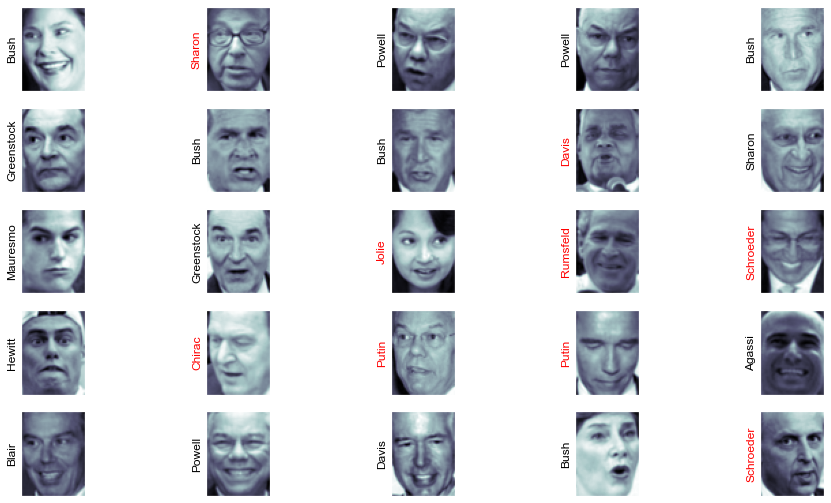

In [123]:
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(X_test[i].reshape(62,47), cmap="bone" )
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
            color="black" if yfit[i]==y_test[i] else "red")

Este modelo es mejor que el otro, tenemos mejor f1 de forma generalizada, aunque un 60% sigue siendo muy poco como para dar como fiable a un modelo.
No obstante si tenemos en cuenta que mucha gente aparecía menos de 100 veces, se ha conseguido clasificar a gente de manera correcta con incluso 0.8 de f1 score contando solo con 5 casos y pocos más en los datos de train.

#### Causas de los malos resultados

Como hemos visto hemos obtenido un accuracy bastante bajo esto debe ser a que tenemos pocos datos de algunas imágenes. Es decir, fuimos muy ambiciosos queriendo obtener clasificaciones de gente que solo aparece 20 veces en las 3023 imágenes de las que disponemos. 

Debido a esta causa, vamos a realizar un análisis rápido menos ambicioso, poniendo como límite que aparezcan mínimo 60 veces para poder formar parte del problema

### Ejecución menos ambiciosa

Vamos a realizar un análisis menos ambicioso pero solo teniendo en cuenta los dos mejores modelos

In [100]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [101]:
print(faces.target_names)
print("Etiquetas únicas:", len(faces.target_names))

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
Etiquetas únicas: 8


In [102]:
X_train, X_test,y_train,y_test= train_test_split(faces.data, faces.target, random_state=42)

#### Logistic Regression

In [103]:
log = LogisticRegression(max_iter=1000)
pca = RandomizedPCA(n_components=150, whiten=True)
model = make_pipeline(pca,log)
model.fit(X_train,y_train)
prediction_logistic = model.predict(X_test)
acc_log = round(accuracy_score(prediction_logistic,y_test) * 100, 2)
print('La precisión (accuracy) de la regresión logistica es {}%'.format(acc_log))

La precisión (accuracy) de la regresión logistica es 81.31%


In [104]:
mat=confusion_matrix(y_test,prediction_logistic)

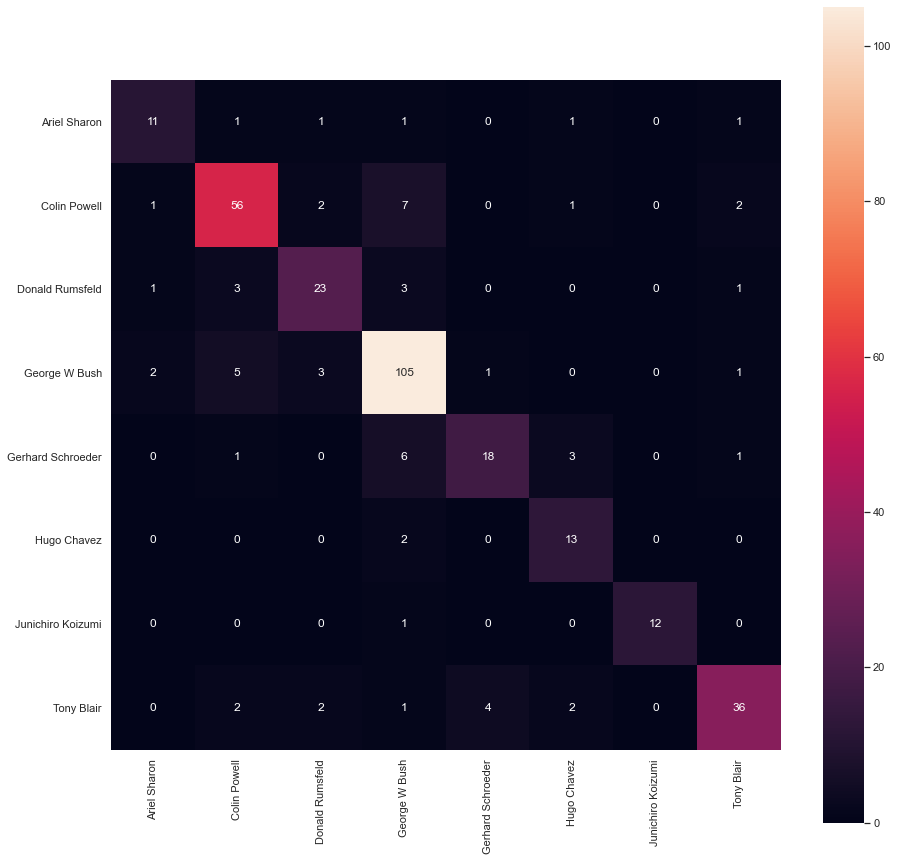

In [105]:
sns.heatmap(mat.T, square=True, annot = True, fmt="d", cbar=True, xticklabels=faces.target_names,
           yticklabels=faces.target_names)

In [106]:
#classification report
report = classification_report(y_test, prediction_logistic)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.81      0.82      0.82        68
           2       0.74      0.74      0.74        31
           3       0.90      0.83      0.86       126
           4       0.62      0.78      0.69        23
           5       0.87      0.65      0.74        20
           6       0.92      1.00      0.96        12
           7       0.77      0.86      0.81        42

    accuracy                           0.81       337
   macro avg       0.79      0.80      0.79       337
weighted avg       0.82      0.81      0.81       337



#### SVC

In [107]:
pca = RandomizedPCA(n_components=150, whiten=True)
svc = SVC(kernel="rbf", class_weight = "balanced")
model =make_pipeline(pca, svc)

In [108]:
param_grid={
    "svc__C":[0.1,1,5,10,15,20,50],
    "svc__gamma":[0.0001,0.0005,0.001,0.005,0.01]
    
}

grid=GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)

Wall time: 2min 24s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.1, 1, 5, 10, 15, 20, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]})

In [109]:
print (grid.best_params_)

{'svc__C': 20, 'svc__gamma': 0.001}


In [110]:
classifier = grid.best_estimator_
yfit = classifier.predict(X_test)
acc_svc=round(accuracy_score(yfit,y_test) * 100, 2)
print('La precisión (accuracy) de SVC es {}%'.format(acc_svc))

La precisión (accuracy) de SVC es 84.87%


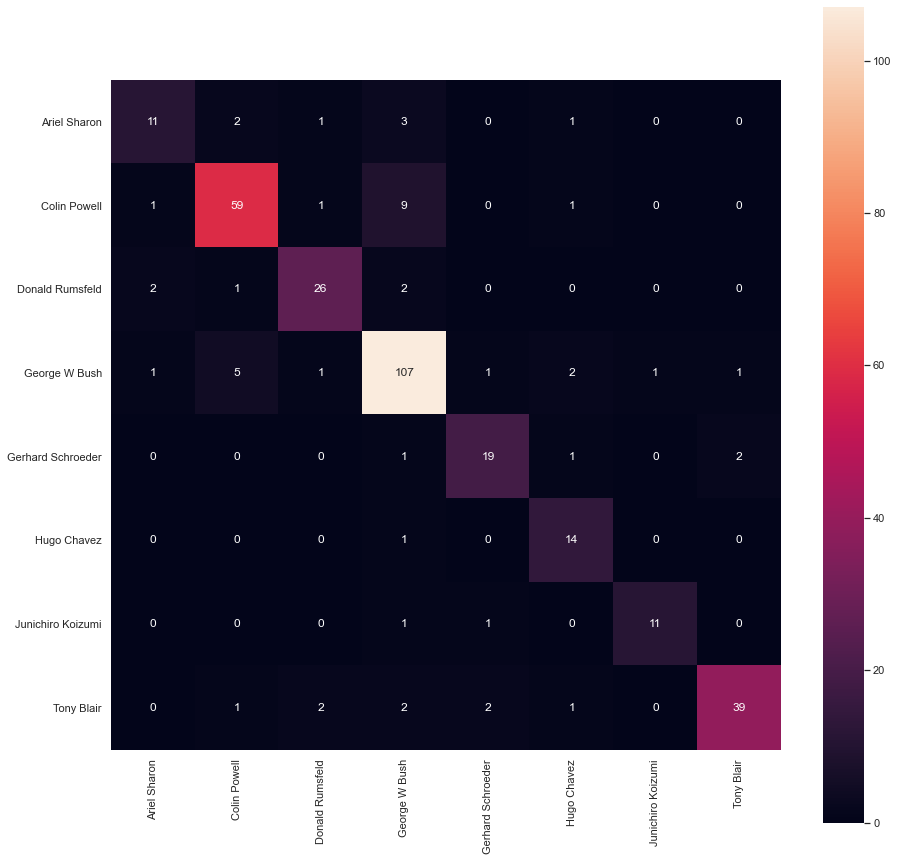

In [111]:
mat=confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot = True, fmt="d", cbar=True, xticklabels=faces.target_names,
           yticklabels=faces.target_names)

In [112]:
#classification report
report = classification_report(y_test, yfit)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.83      0.87      0.85        68
           2       0.84      0.84      0.84        31
           3       0.90      0.85      0.87       126
           4       0.83      0.83      0.83        23
           5       0.93      0.70      0.80        20
           6       0.85      0.92      0.88        12
           7       0.83      0.93      0.88        42

    accuracy                           0.85       337
   macro avg       0.83      0.83      0.83       337
weighted avg       0.85      0.85      0.85       337



Cuando pedimos que las caras salgan un mínimo de 60 veces obtenemos muchos mejores resultados en tema de accuraccy y de f1-score, lo cual es lógico ya que como tenemos más datos de cada tipo para entrenar y además no contamos con una gran cantidad de tipos pues obtenemos de cualquiera de los dos algoritmos buenos resultados. 

#### Pequeña representación

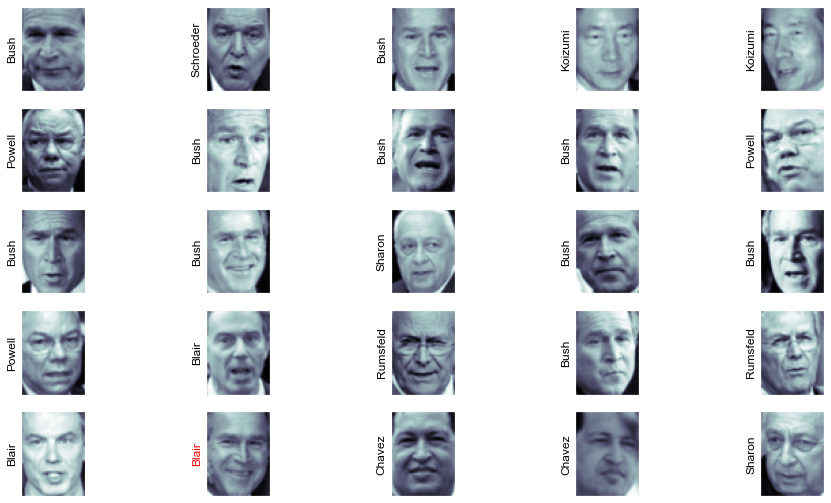

In [115]:
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(X_test[i].reshape(62,47), cmap="bone" )
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
            color="black" if yfit[i]==y_test[i] else "red")

## Conclusiones

Hemos aplicado nuestros conocimientos de machine learning para conseguir desarrollar un modelo que funcionase. En concreto el proyecto trata de aprendizaje supervisado, ya que conocemos el verdadero resultado de las imágenes a la hora de entrenar a nuestro modelo. 


Por otro lado, podemos decir que realmente hemos llevado el asunto por dos caminos, un camino donde hemos tirado por intentar clasificar un gran número de personas, pero debido a esto sacrificamos bastante accuracy. Es decir, conseguimos hacer la clasificación de 62 personas pero solo tuvimos un "acierto" del 60%.

El otro lado del estudio trata sobre reconocer a menos gente pero de manera mucho más precisa. Hemos conseguido clasificar con un "acierto" alrededor del 84%.

Con estas dos vertientes que hemos visto, surge de manera inmediata una pregunta, ¿qué modelo es mejor?. Realmente por lo que he aprendido hasta ahora no creo que sea una pregunta fácil de responder ya que será muy dependiente del problema a resolver. Puesto que algunas veces tendremos interés por clasificar un montón de categorías diferentes y no nos importará perder un poco de acierto. No obstante, si queremos un problema mucho más preciso y más discreto pues será más eficaz tener menos categorías pero con un mayor acierto.